In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 데이터가 얼마나 퍼져 있는지 : 변이 통계량

- 데이터들이 얼마나 흩어져 있는가를 나타내는 것(산포도)
- 하나의 수치로 데이터가 흩어진 정도를 계산 
- 대표값과 더불어 데이터를 비교하는 경우에 유용하게 사용 
- 예. 평균이 같은 A와 B반의 성적 : 두 집단이 동일한 집단?

![](성적분포비교.png)

- 어느 대학에서 같은 과목을 두 교수가 가르친다고 하자.두 교수 모두 평균 C학점을 학생들에게 준다면 그 과목을 배우려는 학생들은 어떤 교수를 선택해도 마찬가지라고 생각할 것이다.
- 그러나 한 교수는 대부분의 학생들이 평범하다고 생각하여 C만 주고 다른 교수는 학생들이 반은 우수하고 반은 공부를 안 한다고 생각하여 A를 주거나 D-만 준다.
- 그러므로 이러한 흩어짐의 정보 없이 학생들이 평균 성적 C라는 사실만 가지고 교수를 선택한다면 학점 때문에 어려움에 처할 수도 있게 된다.


#### 범위(range)

- 데이터의 최대값과 최소값의 차이
- 데이터가 퍼져 있는 정도를 나타내는 가장 간단한 방법
- 범위가 클수록 산포가 크다고 말할 수 있지만
- 중앙값과 마찬가지로 극단적인 값에 영향을 받음
- 데이터 중 2개의 정보(최대값, 최소값)만을 이용하므로 적절한 척도로 사용하기 어려움

**범위(R)=최댓값 - 최솟값**


#### 중간 범위 (/ 중앙값 -> 가운대값 / 평균 이 세개는 다르다.)

- 최대값과 최소값의 평균




#### 사분위간 범위 (interquartile range: IQR)

- 데이터를 크기순서로 나열한 다음, 개수로 4등분할 때 첫 번째 사분위수(Q1:1사분위수, 25%지점)와 세 번째 사분위수(Q3:3사분위수, 75%지점)의 차이


#### 사분위수 편차(quartile deviation)

- 범위의 문제점을 보완한 척도
- 사분위간 범위의 값을 2로 나눈 값으로 사분위 범위의 평균값 

![](사분위수편차.png)


### 분산(variaince)

- 산포도의 척도로 가장 널리 사용되는 방법 
- 데이터가 퍼져 있는 정도의 기준으로 평균을 사용
- 계산방법
    - 각 데이터와 평균과의 차이를 제곱하여 합한 값의 평균
        - 모두 양수로 만들기 위함, 양수 음수가 함께 있으면 상쇄가 발생
    - 데이터가 모집단 전체일 경우에는 데이터의 개수(n)로 나누어 줌
    - 표본일 경우 (n-1)로 나누어 줌
    - 표본의 경우 n으로 나누어 주는 것보다 (n-1)로 나누어 주는 것이 더 좋은 척도가 되기 때문인데 표본의 크기가 큰 경우에는 별 차이가 없음
    
    ![](분산식.png)


#### 분산 계산 : var() 함수 사용

In [3]:
## ddof인수 :  (자유도-모수집단냐 표본이냐)는 값을 1로 두고 사용한다고 생각하면 편함
## 특별한 경우 제외하고는 모두 sample 데이터이므로 분모를 n-1로 둠
## 즉 , ddof는 1로 둔다
x = [1, 2, 3, 4, 5]
np.var(x, ddof=1) # 분모 = n-1
np.array(x).var() # 분모 = n
pd.Series(x).var(ddof=0) # 분모 = n

# 값의 스케일에 크게 영향을 받음으로
# 변수를 스케일링 한 후 분산, 표준편차를 구하는게 일반적임




2.5

2.0

2.0

### 표준편차(standard deviation)


- 계산된 분산의 제곱근으로 계산
- 평균을 중심으로 일정한 거리에 포함된 데이터의 비율이 얼마인가를 계산
- 모든 데이터를 고려한 척도


- 특징
    - 모든 데이터가 동일한 값을 갖는다면 분산과 표준편차는 0으로 계산
    - 모든 데이터에 동일한 값을 더해 주거나 빼도 변하지 않음
    - 모든 데이터에 동일한 값(C)을 곱하면 분산은 $분산×C^2$으로 표준편차는 $표준편차×C$ 만큼 커짐 
    
    ![](분산표준편차예시.png)

#### 표준편차 계산 : std() 함수 사용

- 분산에서제곱의 영향을없앤 지표
- 분산과 표준편차가 크면 클수록 산포가 크다

In [4]:
x = [1, 2, 3, 4, 5]
np.std(x, ddof=1)
np.std(x, ddof=0)
np.array(x).std(ddof=1)

1.5811388300841898

1.4142135623730951

1.5811388300841898

#### 변동계수(CV: Coefficient of Variable)

- 표본 표준편차를 표본평균으로 나눈 값 또는 그 값에 100을 곱한 값
- 상대표준편차
- **서로 다른 평균과 표준편차를 갖는 여러 데이터의 흩어진 정도를 비교**할 때 사용
- 변동계수 값이 크다는 것은 데이터의 흩어진 정도가 상대적으로 크다는 의미

- 표본 변동계수 $ 𝐶𝑉=\frac{S}{\overline{x}}$,  모변동계수  $𝐶𝑉= \frac{𝜎}{𝜇}$

![](변동계수.png)


#### 변동계수의 필요성
- 변수 스케일링 한 후 표준편차를 구함(데이터가 모두 양수인 경우 변동계수 사용)

In [5]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10
np.std(x1, ddof=1)
np.std(x2, ddof=1)

1.5811388300841898

15.811388300841896

In [6]:
# 변동계수는 동일 함
# ddof는 0 
variation(x1)
variation(x2)


0.47140452079103173

0.4714045207910317

In [7]:
# 변동계수 수식
np.std(x1, ddof=1)/np.mean(x1)
np.std(x2, ddof=1)/np.mean(x2)


0.5270462766947299

0.5270462766947299

#### 스케일링 (표준화)

- 평균 : 0, 표준편차 : 1 이 됨
- 각 값들을 상대적인 값으로 변화시키는 기법
- 평균이 95점(국어) 평균이 30(수학)
- 취득점수 국어 90, 수학 80 이라면 어떤 과목을 더 잘한건가
- 표준화된 데이터는 점수와 같은 단위를 사용하지 않는다

In [8]:
x1

array([1, 2, 3, 4, 5])

In [9]:
x2

array([10, 20, 30, 40, 50])

In [10]:
# standard scaling - 평균이 0 표준편차가 1이 됨
# (data - data_set.mean())/data_set.std()

z1 = (x1-x1.mean())/x1.std()
z2 = (x2-x2.mean())/x2.std()

print(z1)
print(z2) # 보통 -3에서 +3 까지 분포 됨

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [11]:
z1.mean()
z1.std()

0.0

0.9999999999999999

#### << 2023-01-10 >>

#### 표준화 예제

In [28]:
df = pd.read_csv('../../DB_work/csv/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [29]:
scores = df.loc[1:10]
scores.index=['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J']
scores.index.name='students'

In [30]:
scores
scores.mean()
scores.std()

,english,mathematics
students,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


english        55.0
mathematics    71.4
dtype: float64

english        9.775252
mathematics    8.720347
dtype: float64

In [31]:
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
# import numpy as np
# # numpy float 출력옵션 변경
# np.set_printoptions(precision=3)

import numpy as np
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [32]:
# 표준화 계산 (xset - xset.mean())/xset.std()
em_z = (scores['english']-scores['english'].mean())/scores['english'].std()
mt_z = (scores['mathematics']-scores['mathematics'].mean())/scores['mathematics'].std()
em_z
mt_z

students
A   -1.329889
B    1.432188
C    0.102299
D   -1.432188
E    0.204598
F   -0.716094
G    1.022992
H   -0.613795
I    1.022992
J    0.306897
Name: english, dtype: float64

students
A   -0.733916
B    0.986199
C   -0.963264
D   -0.963264
E    0.527502
F   -1.307287
G    1.100874
H   -0.619241
I    0.756851
J    1.215548
Name: mathematics, dtype: float64

In [33]:
em_z.mean()
mt_z.mean()
em_z.std()

#-6.883382752675971e-16
#-0.0000000000000006.883382752675971  => 0이라고 봄
mt_z.std()

2.7755575615628914e-17

-6.883382752675971e-16

0.9999999999999999

1.0

### sklearn을 이용한 스케일링 - 머신러닝을위해 쓰는 경우가 대부분
- df의 각 열에 대해서 스케일링하는데 적합함

In [34]:
import pandas as pd
X = pd.DataFrame({"X1":[1, 2, 3, 4, 5],
    "X2": [10, 20, 30, 40, 50]})

X

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [35]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 인스턴스 생성
Z = scaler.fit_transform(X) # 표준화 진행 후 array 반환


pd.DataFrame(Z)

#표준편차가 같기 때문에 스케일링 결과가 같은 값으로 나오게 된다.
Z.mean()
Z.std()

,0,1
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


0.0

0.9999999999999999

### MinMaxScaling

In [36]:
# 언제나 최소값과 최대값이 균일하다면 사용 가능
# 아니라면 사용하지 말 것
import numpy as np

x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

In [37]:
# (data - data_set.min() / 범위 : data_set.max() - data.set.min())

z1 = (x1 - x1.min()) / (x1.max() - x1.min())
z2 = (x2 - x2.min()) / (x2.max() - x2.min())

print(z1)
print(z2)

[0.000 0.250 0.500 0.750 1.000]
[0.000 0.250 0.500 0.750 1.000]


In [38]:
X

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Z = scaler.fit_transform(X)
pd.DataFrame(Z)

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


#### 편찻값
- 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [40]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [41]:
result=pd.concat([scores,z], axis=1)
result.columns=['영어','수학','영어편찻값','수학편찻값']
result[['영어','영어편찻값','수학','수학편찻값']]

,영어,영어편찻값,수학,수학편찻값
students,,,,
A,42,35.981739,65,42.263848
B,69,65.096588,80,60.395454
C,56,51.078328,63,39.846301
D,41,34.903412,63,39.846301
E,57,52.156655,76,55.560359
F,48,42.451706,60,36.219980
G,65,60.783277,81,61.604227
H,49,43.530034,66,43.472622
I,65,60.783277,78,57.977906


LogisticRegression(C=100000.0)

([], [])

([], [])

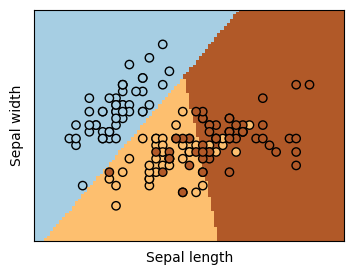

In [43]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()